In [1]:
from scipy import optimize
from scipy.optimize import minimize

In [2]:
import numpy as np

In [10]:
import matplotlib.pyplot as plt

<a href = 'https://www.youtube.com/watch?v=cXHvC_FGx24' style='font-size:30px'>Youtube video reference</a>

In [24]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where x is an 1-D array with shape (n,) and `args`
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see here) <op

```python
minimize(
    fun,
    x0,
    args=(),
    method=None,
    jac=None,
    hess=None,
    hessp=None,
    bounds=None,
    constraints=(),
    tol=None,
    callback=None,
    options=None,
)
```

<p style = 'font-size: 24px'>
$$min \hspace{1cm}x_1x_4(x_1+x_2+x_3)+x_3\\ 
s.t \hspace{1cm}x_1x_2x_3x_4\ge25\\
x_1^2+x_2^2+x_3^2+x_4^2=40\\
1\le x_1,x_2,x_3,x_4\le5\\
x0 = (1,5,5,1)$$
</p>

$x_1x_4(x_1+x_2+x_3)+x_3$

In [10]:
#objective funtion
#why not func(x1, x2, x3, x4) ??? because each different problems has diffrent number of variables
#so developers design a list contain all variables
def func(variables):
    x1, x2, x3, x4 = variables
    return x1 * x4 * (x1 + x2 + x3) + x3

$x_1x_2x_3x_4 - 25 \ge 0$

In [2]:
#constraint function
def constraint_function1(variables):
    x1, x2, x3, x4 = variables
    return x1 * x2 * x3 * x4 - 25

In [3]:
#define the type of constaint and function for that constaint
constraint1 = dict(type = 'ineq', fun = constraint_function1)
constraint1

{'type': 'ineq', 'fun': <function __main__.constraint_function1(variables)>}

$x_1^2+x_2^2+x_3^2+x_4^2 - 40 = 0$

In [4]:
#constraint function
def constraint_function2(variables):
    x1, x2, x3, x4 = variables
    return x1 * x1 + x2 * x2 + x3 * x3 + x4 * x4 - 40

In [5]:
#define the type of constaint and function for that constaint
constraint2 = dict(type = 'eq', fun = constraint_function2)

In [6]:
#put all constraints into a group
constraints = [constraint1, constraint2]

In [7]:
#bounds for each variable
bounds = ((1,5), (1,5), (1,5), (1,5)) #the first bound of x1, second bound of x2, ...

In [8]:
#initial guess
x0 = (1,5,5,1)

In [11]:
#the final solution
solution = minimize(func, x0, bounds = bounds, constraints=constraints, method = 'SLSQP')
solution

     fun: 17.01401724556073
     jac: array([14.57227039,  1.37940764,  2.37940764,  9.56415081])
 message: 'Optimization terminated successfully.'
    nfev: 30
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([1.        , 4.74299607, 3.82115466, 1.37940764])

<p style = 'font-size:24px'>
$$
min \hspace{1cm} x_1^2 + x_1x_2\\
s.t \hspace{1cm} x_1^3+x_1x_2=100\\
x_1^2+x_2 \ge 50\\
-100 \le x_1,x_2 \le 100
$$

In [25]:
def objective(var):
    x1, x2 = var
    return x1 * x1 + x1 * x2

In [26]:
def constraint_function1(var):
    x1, x2 = var
    return x1 * x1 * x1 + x1 * x2 - 100

In [27]:
constraint1 = dict(type = 'eq', fun = constraint_function1)

In [35]:
def constrain_function2(var):
    x1, x2 = var
    return x1 * x1 + x2 - 50

In [36]:
constraint2 = dict(type = 'eq', fun = constrain_function2)

In [37]:
constraints = (constraint1, constraint2)

In [38]:
bounds = ((-100, 100), (-100, 100))

In [39]:
minimize(objective, x0 = (1,1), bounds = bounds, constraints = constraints, method = 'SLSQP')

     fun: 96.00000006640228
     jac: array([50.,  2.])
 message: 'Optimization terminated successfully.'
    nfev: 26
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([ 2.        , 45.99999999])

# Unconstrainted minimization of multivariate scalar functions

Minimize: $$\hspace{1cm} f(x) = (x-3) ^ 2 + (y - 5) ^ 2$$

## Nelder-Mead Simplex Algorithm(`method = nelder-mead`)

In [4]:
def func(variables):
    x, y = variables
    return (x - 3) * (x - 3) + (y - 5) * (y - 5)

In [5]:
minimize(func, x0 = (0,0), method = 'nelder-mead')

 final_simplex: (array([[3.00003488, 5.0000237 ],
       [2.99993908, 4.99998174],
       [3.00001978, 4.99993554]]), array([1.77838977e-09, 4.04516719e-09, 4.54660746e-09]))
           fun: 1.778389772503148e-09
       message: 'Optimization terminated successfully.'
          nfev: 142
           nit: 73
        status: 0
       success: True
             x: array([3.00003488, 5.0000237 ])

The simplex algorithm is probably the simplest way to minimize a fairly well-behaved function. <br>
It requires only function evaluations and is a good choice for simple minimization problems. <br>However, because it does not use any gradient evaluations, it may take longer to find the minimum.

In [6]:
#Another optimization algorithm that needs only function calls to find the minimum is Powell's method
minimize(func, x0 = (0,0), method = 'powell')

   direc: array([[1., 0.],
       [0., 1.]])
     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 38
     nit: 2
  status: 0
 success: True
       x: array([3., 5.])

## Broyden-Fletcher-Goldfarb-Shanno algorithm (method='BFGS')¶

In order to converge more quickly to the solution, this routine uses the gradient of the objective function.  
If the gradient is not given by the user, then it is estimated using first-differences.  
The Broyden-Fletcher-Goldfarb-Shanno (BFGS) method typically requires fewer function calls than the simplex algorithm even when the gradient must be estimated.

$$\frac{\partial f}{\partial x} = 2(x-3)$$

$$\frac{\partial f}{\partial y} = 2(y-5)$$

In [16]:
def gradient(variables):
    x, y = variables
    print(x, y)
    #must return a numpy array
    return np.array([2 * x - 6, 2 * y - 10])
#jac is the jacobian
minimize(func, x0 = (1,2), jac = gradient, method = 'BFGS')

1.0 2.0
1.560247198187481 2.8403707972812215
2.9121341234425735 4.86820118516386
3.0 5.0


      fun: 0.0
 hess_inv: array([[ 0.84615385, -0.23076923],
       [-0.23076923,  0.65384615]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([3., 5.])

## Newton-Conjugate-Gradient algorithm (method='Newton-CG')¶

Second order optimization using the Hessian Matrix

$$H = \begin{bmatrix}
2 & 0\\
0 & 2
\end{bmatrix}$$

In [17]:
def Hessian(variables):
    return np.array([[2,0], [0,2]])

In [24]:

minimize(func, x0 = (0,0), jac= gradient, hess = Hessian, method = 'newton-cg')

0.0 0.0
3.0 5.0
3.0 5.0
3.0 5.0


     fun: 0.0
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 3
    nhev: 2
     nit: 2
    njev: 4
  status: 0
 success: True
       x: array([3., 5.])

## Trust-Region Newton-Conjugate-Gradient Algorithm (method='trust-ncg')¶

<b style = 'color:red'>suitable for large scale problem</b>

In [25]:
minimize(func, (0,0), jac = gradient, hess = Hessian, method = 'trust-ncg')

0.0 0.0
0.5144957554275265 0.8574929257125441
1.5434872662825794 2.5724787771376327
3.0 5.0


     fun: 0.0
    hess: array([[2, 0],
       [0, 2]])
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 4
    nhev: 3
     nit: 3
    njev: 4
  status: 0
 success: True
       x: array([3., 5.])

## Trust-Region Truncated Generalized Lanczos (method = 'trust-krylov')

<b style = 'color:red'>suitable for large scale problem</b>

In [26]:
minimize(func, (0,0), jac = gradient, hess= Hessian, method = 'trust-krylov')

0.0 0.0
0.5144957554275263 0.8574929257125439
1.5434872662825794 2.5724787771376327
3.0 5.0


     fun: 0.0
    hess: array([[2, 0],
       [0, 2]])
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 4
    nhev: 3
     nit: 3
    njev: 4
  status: 0
 success: True
       x: array([3., 5.])

## Trust-Region Nearly Exact Algorithm (method='trust-exact')¶

<b style='color:red'>suitable for medium size problems</b>

In [27]:
minimize(func, x0=(0,0), jac = gradient, hess = Hessian, method = 'trust-exact')

0.0 0.0
0.5144957554275266 0.8574929257125442
1.5434872662825798 2.5724787771376327
3.0 5.0


     fun: 0.0
    hess: array([[2, 0],
       [0, 2]])
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 4
    nhev: 4
     nit: 3
    njev: 4
  status: 0
 success: True
       x: array([3., 5.])

# Constrained minimization of multivariate scalar functions (minimize)¶

methods:
* `trust-constr`
* `SLSQP`: Sequential Least SQuare Programming
* `COBYLA`

$$min \hspace{1cm}100(x_1 - x_0^2) + (1 - x_0)^2\\
s.t \\
 x_0 + 2x_1 \le 1 \\
x_0^2 + x_1 \le 1 \\
x_0^2 - x_1 \le 1 \\
2x_0 + x_1 = 1 \\
0 \le x_0 \le 1 \\
-0.5 \le x_1 \le 2.0
$$

In [34]:
#objective function
def objective(x):
    x0, x1 = x
    return 100 *(x1 - x0 * x0) + (1 - x0) ** 2

In [35]:
#constraints
cs1 = dict(type = 'ineq', fun = lambda x: 1 - x[0] - 2 * x[1]) #1 - x0 - 2x1 >= 0
cs2 = dict(type = 'ineq', fun = lambda x: 1 - x[1] - x[0] ** 2)
cs3 = dict(type = 'ineq', fun = lambda x: 1 + x[1] - x[0] ** 2)
cs4 = dict(type = 'eq', fun = lambda x: 2 * x[0] + x[1] - 1)
cs = (cs1, cs2, cs3, cs4)

In [36]:
#bounds
bounds = ((0,1), (-0.5, 2.0))

In [37]:
minimize(objective, x0 = (1,2), method = 'SLSQP', constraints =cs, bounds = bounds)

     fun: -99.92820407699624
     jac: array([-146.94606018,  100.        ])
 message: 'Optimization terminated successfully.'
    nfev: 27
     nit: 5
    njev: 4
  status: 0
 success: True
       x: array([ 0.73205081, -0.46410162])

# Global minimization

Global optimization aims to find the global minimum of a function within given bounds, in the presence of potentially many local minima. 

In [38]:
from scipy.optimize import shgo

```python
shgo(
    func,
    bounds,
    args=(),
    constraints=None,
    n=100,
    iters=1,
    callback=None,
    minimizer_kwargs=None,
    options=None,
    sampling_method='simplicial',
)
Docstring:
Finds the global minimum of a function using SHG optimization.

SHGO stands for "simplicial homology global optimization".
```

# Root Finding

if one has a single-variable equation, there are multiple different root finding algorithms that can be tried. Most of these algorithms require the endpoints of an interval in which a root is expected (because the function changes signs). In general, **`brentq`** is the best choice, but the other methods may be useful in certain circumstances or for academic purposes. 

$$x+2cos(x) = 0$$

In [12]:
from scipy.optimize import root

```python
root(
    fun,
    x0,
    args=(),
    method='hybr',
    jac=None,
    tol=None,
    callback=None,
    options=None,
)
Docstring:
Find a root of a vector function.

Parameters
----------
fun : callable
    A vector function to find a root of.
x0 : ndarray
    Initial guess.
args : tuple, optional
    Extra arguments passed to the objective function and its Jacobian.
method : str, optional
    Type of solver.  Should be one of

        - 'hybr'             :ref:`(see here) <optimize.root-hybr>`
        - 'lm'               :ref:`(see here) <optimize.root-lm>`
        - 'broyden1'         :ref:`(see here) <optimize.root-broyden1>`
        - 'broyden2'         :ref:`(see here) <optimize.root-broyden2>`
        - 'anderson'         :ref:`(see here) <optimize.root-anderson>`
        - 'linearmixing'     :ref:`(see here) <optimize.root-linearmixing>`
        - 'diagbroyden'      :ref:`(see here) <optimize.root-diagbroyden>`
        - 'excitingmixing'   :ref:`(see here) <optimize.root-excitingmixing>`
        - 'krylov'           :ref:`(see here) <optimize.root-krylov>`
        - 'df-sane'          :ref:`(see here) <optimize.root-dfsane>`

jac : bool or callable, optional
    If `jac` is a Boolean and is True, `fun` is assumed to return the
    value of Jacobian along with the objective function. If False, the
    Jacobian will be estimated numerically.
    `jac` can also be a callable returning the Jacobian of `fun`. In
    this case, it must accept the same arguments as `fun`.
tol : float, optional
    Tolerance for termination. For detailed control, use solver-specific
    options.
callback : function, optional
    Optional callback function. It is called on every iteration as
    ``callback(x, f)`` where `x` is the current solution and `f`
    the corresponding residual. For all methods but 'hybr' and 'lm'.
options : dict, optional
    A dictionary of solver options. E.g. `xtol` or `maxiter`, see
    :obj:`show_options()` for details.

Returns
-------
sol : OptimizeResult
    The solution represented as a ``OptimizeResult`` object.
    Important attributes are: ``x`` the solution array, ``success`` a
    Boolean flag indicating if the algorithm exited successfully and
    ``message`` which describes the cause of the termination. See
    `OptimizeResult` for a description of other attributes.
```

In [14]:
def f(x):
    return x + 2 * np.cos(x)

In [18]:
solution = root(f, x0 = 0.3)
solution

    fjac: array([[-1.]])
     fun: array([-6.66133815e-16])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-1.20746968e-09])
       r: array([-2.71445911])
  status: 1
 success: True
       x: array([-1.02986653])

In [19]:
#using gradient
root(f, 1, jac = lambda x: 1 - 2 * np.sin(x))

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
    njev: 1
     qtf: array([3.32778249e-12])
       r: array([-2.71446049])
  status: 1
 success: True
       x: array([-1.02986653])

<hr>

The different methods are obtained upon changing the value of the method
parameter to a method string. We may choose among the methods such as `hybr`
for a modified hybrid Powell's method; `lm` for a modified least-squares method;
`broyden1` or `broyden2` for Broyden's good and bad methods, respectively;
`diagbroyden` for diagonal Broyden Jacobian approximation; `anderson` for
Anderson's extended mixing; `Krylov` for Krylov approximation of the Jacobian;
`linearmixing` for scalar Jacobian approximation; and `excitingmixing` for a
tuned diagonal Jacobian approximation.
For large-scale problems, both the Krylov approximation of the Jacobian or the
Anderson extended mixing are usually the best options.


<hr>

Consider now a set of non-linear equations

$$x_0cos(x_1)=4\\x_0x_1-x_1=5$$

We define the objective function so that it also returns the Jacobian and indicate this by setting the jac parameter to True. Also, the Levenberg-Marquardt solver is used here.

In [22]:
def f(x):
    equation_1 = x[0] * np.cos(x[1]) - 4
    equation_2 = x[0] * x[1] - x[1] - 5
    objective = [equation_1, equation_2]
    #jacobian matrix
    df = df = np.array([
        [np.cos(x[1]), -x[0] * np.sin(x[1])],
        [x[1], x[0] - 1]
    ])
    return objective, df


In [23]:
root(f, x0=(0,1), jac = True, method = 'lm')

   cov_x: array([[ 0.87470958, -0.02852752],
       [-0.02852752,  0.01859874]])
    fjac: array([[ 7.52318843, -0.73161761],
       [ 0.24535902, -1.06922242]])
     fun: array([-4.4408921e-16,  0.0000000e+00])
    ipvt: array([2, 1], dtype=int32)
 message: 'The relative error between two consecutive iterates is at most 0.000000'
    nfev: 10
    njev: 8
     qtf: array([8.37468985e-09, 2.00391624e-09])
  status: 2
 success: True
       x: array([6.50409711, 0.90841421])

<hr>

In [25]:
#equivalent
def func(x):
    x0, x1 = x
    return [x0 * np.cos(x1) - 4, x0 * x1 - x1 - 5]

def grad(x):
    x0, x1 = x
    return [
        [np.cos(x1), -x0 * np.sin(x1)],
        [x1, x0 - 1]
    ]

root(func, (0,1), jac = grad, method = 'lm')

   cov_x: array([[ 0.87470958, -0.02852752],
       [-0.02852752,  0.01859874]])
    fjac: array([[ 7.52318843, -0.73161761],
       [ 0.24535902, -1.06922242]])
     fun: array([-4.4408921e-16,  0.0000000e+00])
    ipvt: array([2, 1], dtype=int32)
 message: 'The relative error between two consecutive iterates is at most 0.000000'
    nfev: 10
    njev: 8
     qtf: array([8.37468985e-09, 2.00391624e-09])
  status: 2
 success: True
       x: array([6.50409711, 0.90841421])

<b style='color:red'>NOTES: Root finding for large problems</b>:  
        Now, because  can be large, methods **`hybr`** or **`lm`** in root will take a long time to solve this problem. The solution can, however, be found using one of the large-scale solvers, for example **`krylov`**, **`broyden2`**, or **`anderson`**. 

$$x^2-y^2+xy=1\\3x+y=y^3+3$$

In [58]:
def func(var):
    x, y = var
    eq_1 = x * x - y * y + x * y - 1
    eq_2 = 3 * x + y - y ** 3 - 3
    return [eq_1, eq_2]

root(func, x0 = (1,1), method = 'krylov')

     fun: array([0., 0.])
 message: 'A solution was found at the specified tolerance.'
     nit: 1
  status: 1
 success: True
       x: array([1., 1.])

$$x^2+y^2=2x^2y^2\\(x+y)(1+xy)=4x^2y^2$$

In [60]:
def func(var):
    x, y = var
    eq_1 = x * x + y * y - 2 * (x ** 2) * (y ** 2)
    eq_2 = (x + y) * (1 + x * y) - 4 * (x ** 2)  * (y ** 2)
    return eq_1, eq_2

root(func, x0 = (0,0), method = 'broyden2')

     fun: array([0., 0.])
 message: 'A solution was found at the specified tolerance.'
     nit: 1
  status: 1
 success: True
       x: array([0., 0.])

$$2x+3y=5xy\\4x^2+y^2=5xy^2$$

In [61]:
def func(var):
    x, y = var
    return [2*x+3*y-5*x*y,4*x*x+y*y-5*x*y*y]

root(func, x0 = (0,0), method = 'anderson')

     fun: array([0., 0.])
 message: 'A solution was found at the specified tolerance.'
     nit: 1
  status: 1
 success: True
       x: array([0., 0.])

# Univariate function minimizers (minimize_scalar)¶

minimize functions with just a single variable  
Often only the minimum of an univariate function (i.e., a function that takes a scalar as input) is needed. In these circumstances, other optimization techniques have been developed that can work faster. These are accessible from the **`minimize_scalar`** function, which proposes several algorithms.

In [64]:
from scipy.optimize import minimize_scalar


```python
minimize_scalar(
    fun,
    bracket=None,
    bounds=None,
    args=(),
    method='brent',
    tol=None,
    options=None,
)
Docstring:
Minimization of scalar function of one variable.

Parameters
----------
fun : callable
    Objective function.
    Scalar function, must return a scalar.
bracket : sequence, optional
    For methods 'brent' and 'golden', `bracket` defines the bracketing
    interval and can either have three items ``(a, b, c)`` so that
    ``a < b < c`` and ``fun(b) < fun(a), fun(c)`` or two items ``a`` and
    ``c`` which are assumed to be a starting interval for a downhill
    bracket search (see `bracket`); it doesn't always mean that the
    obtained solution will satisfy ``a <= x <= c``.
bounds : sequence, optional
    For method 'bounded', `bounds` is mandatory and must have two items
    corresponding to the optimization bounds.
args : tuple, optional
    Extra arguments passed to the objective function.
method : str or callable, optional
    Type of solver.  Should be one of:

        - 'Brent'     :ref:`(see here) <optimize.minimize_scalar-brent>`
        - 'Bounded'   :ref:`(see here) <optimize.minimize_scalar-bounded>`
        - 'Golden'    :ref:`(see here) <optimize.minimize_scalar-golden>`
        - custom - a callable object (added in version 0.14.0), see below

tol : float, optional
    Tolerance for termination. For detailed control, use solver-specific
    options.
options : dict, optional
    A dictionary of solver options.

        maxiter : int
            Maximum number of iterations to perform.
        disp : bool
            Set to True to print convergence messages.

    See :func:`show_options()` for solver-specific options.
            ```

### Unconstrained minimization (method='brent')¶

$$min \hspace{0.1cm} x^2 - 2x + 1$$

In [65]:
minimize_scalar(lambda x: x * x - 2 * x + 1, method = 'brent')

     fun: 0.0
    nfev: 8
     nit: 4
 success: True
       x: 1.0

### Bounded minimization (method='bounded')¶

$$min \hspace{0.2cm} x^4 - 3x^3 + 9x^2 - 1\\
-100 \le x \le 100$$

In [66]:
minimize_scalar(lambda x: x ** 4 - 3 * x ** 3 + 9 * x ** 2 - 1, bounds = (-100,100), method = 'bounded')

     fun: -0.9999999999998834
 message: 'Solution found.'
    nfev: 14
  status: 0
 success: True
       x: 1.1381569853957064e-07

# Linear programming (linprog)¶

In [69]:
from scipy.optimize import linprog

```python
linprog(
    c,
    A_ub=None,
    b_ub=None,
    A_eq=None,
    b_eq=None,
    bounds=None,
    method='simplex',
    callback=None,
    options=None,
)
```

Linear programming has form:

$$min\hspace{0.5cm} c^Tx\\
s.t\\A_{ub}x \le b_{ub}\\
A_{eq}x = b_{eq}\\
l \le x \le u$$

Example:

$$max \hspace{0.2cm}29x_1+45x_2\\s.t\\
x_1-x_2-3x_3\le 5\\
2x_1-3x_2-7x_3+3x_4 \ge 10\\
2x_1+8x_2+x_3=60\\
4x_1+4x_2+x_4=60\\
0 \le x_0\\
0 \le x_1 \le 5\\
x_2 \le 0.5\\
-3 \le x_3$$

In [98]:
c = np.array([-29,-45,0,0], dtype = np.float64)

A_ub = np.array([
    [1,-1,-3,0],
    [-2,3,7,-3]
], dtype = np.float64)
b_ub = np.array([5,-10], dtype = np.float64)

A_eq = np.array([
    [2,8,1,0],
    [4,4,0,1]
], dtype = np.float64)

b_eq = np.array([60,60], dtype = np.float64)


bound1 = (0, np.inf)
bound2 = (0, 5)
bound3 = (-np.inf, 0.5)
bound4 = (-3, np.inf)
bounds = (bound1, bound2, bound3, bound4)



In [100]:
linprog(c = c, 
        A_ub = A_ub, b_ub = b_ub, A_eq = A_eq, b_eq = b_eq, bounds = bounds)

     con: array([0.94594595, 0.        ])
     fun: -503.2432432432432
 message: "Phase 1 of the simplex method failed to find a feasible solution. The pseudo-objective function evaluates to 9.5e-01 which exceeds the required tolerance of 1e-12 for a solution to be considered 'close enough' to zero to be a basic solution. Consider increasing the tolerance to be greater than 9.5e-01. If this tolerance is unacceptably  large the problem may be infeasible."
     nit: 5
   slack: array([ 0.00000000e+00, -1.77635684e-15])
  status: 2
 success: False
       x: array([ 9.59459459,  5.        , -0.13513514,  1.62162162])

# Least Square

In [26]:
import matplotlib.pyplot as plt

In [27]:
from scipy.optimize import leastsq

```python
leastsq(
    func,
    x0,
    args=(),
    Dfun=None,
    full_output=0,
    col_deriv=0,
    ftol=1.49012e-08,
    xtol=1.49012e-08,
    gtol=0.0,
    maxfev=0,
    epsfcn=None,
    factor=100,
    diag=None,
)
Docstring:
Minimize the sum of squares of a set of equations.

      x = arg min(sum(func(y)**2,axis=0))
               y

```

In [29]:
np.info(leastsq)

 leastsq(func, x0, args=(), Dfun=None, full_output=0, col_deriv=0,
         ftol=1.49012e-08, xtol=1.49012e-08, gtol=0.0, maxfev=0, epsfcn=None,
         factor=100, diag=None)

Minimize the sum of squares of a set of equations.

::

    x = arg min(sum(func(y)**2,axis=0))
             y

Parameters
----------
func : callable
    should take at least one (possibly length N vector) argument and
    returns M floating point numbers. It must not return NaNs or
    fitting might fail.
x0 : ndarray
    The starting estimate for the minimization.
args : tuple, optional
    Any extra arguments to func are placed in this tuple.
Dfun : callable, optional
    A function or method to compute the Jacobian of func with derivatives
    across the rows. If this is None, the Jacobian will be estimated.
full_output : bool, optional
    non-zero to return all optional outputs.
col_deriv : bool, optional
    non-zero to specify that the Jacobian function computes derivatives
    down the columns (faster,

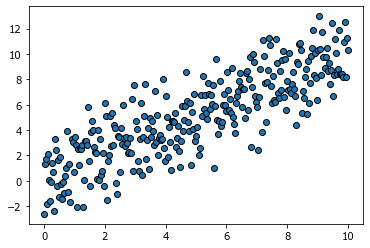

In [33]:
n = 300
x_data = np.linspace(0, 10, n)
y_data = X + np.random.normal(size = n, scale = 2)
plt.scatter(x_data, y_data, ec = 'k')

In [37]:
X = np.stack((x_data, np.ones_like(x_data)), axis = 1)
y = y_data.copy()

def residual(w):
    return X @ w - y

solution, cov_x = leastsq(residual, x0 = (1,0))
solution

array([0.96688288, 0.34305783])

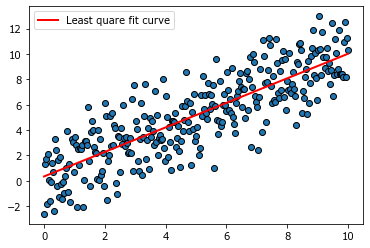

In [41]:
plt.scatter(x_data, y_data, ec = 'k')
plt.plot(x_data, X @ solution, '-r', lw = 2, label = 'Least quare fit curve')
plt.legend()

## Example: Fitting Gaussian to sinc Function

Gaussian Model:

$$B + A.exp(-(\frac{t-\mu}{\sigma})^2)$$

where: $B(noise), A(amplitude),\mu(center),\sigma(width)$ are parameters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

Text(0.5, 0, 'Sinc Function scatter')

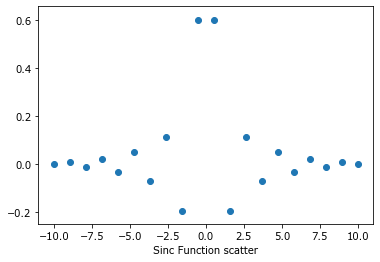

In [2]:
x = np.linspace(-10,10,20)
y = np.sinc(x)
plt.scatter(x,y)
plt.xlabel('Sinc Function scatter')

In [4]:
#Gaussian Function: receive a list of parameters, input x, return gassian density for x
def gaussian(coeffs, x):
    A, B, mu, sigma = coeffs
    return B + A * np.exp(-np.square((x-mu) / sigma)) 

def residual(coeffs,x,y):
    return gaussian(coeffs, x) - y

solution, cov = leastsq(residual, x0 = np.random.rand(4), args = (x,y)) #args = (x,y) passing data to redisual function
solution

array([ 4.92208237e+00, -1.40457171e-02, -1.05712608e-09,  3.65198011e-01])

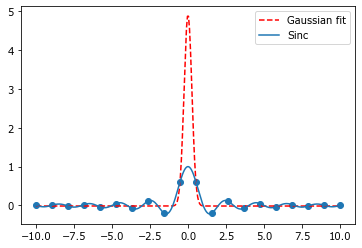

In [8]:
plt.scatter(x,y)

x_grid = np.mgrid[-10:10:300j]
plt.plot(x_grid, gaussian(solution, x_grid), '--r', label = 'Gaussian fit')
plt.plot(x_grid, np.sinc(x_grid), '-', label = 'Sinc')
plt.legend()

# Curve fit

In [1]:
from scipy.optimize import curve_fit

```python
urve_fit(
    f,
    xdata,
    ydata,
    p0=None,
    sigma=None,
    absolute_sigma=False,
    check_finite=True,
    bounds=(-inf, inf),
    method=None,
    jac=None,
    **kwargs,
)

Docstring:
Use non-linear least squares to fit a function, f, to data.

Assumes ``ydata = f(xdata, *params) + eps``
```

In [6]:
help(curve_fit)

Help on function curve_fit in module scipy.optimize.minpack:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...).  It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : An M-length sequence or an (k,M)-shaped array for functions with k predictors
        The independent variable where the data is measured.
    ydata : M-length sequence
        The dependent data --- nominally f(xdata, ...)
    p0 : None, scalar, or N-length sequence, optional
        Initial guess for the parameters.  If None, then the initial
        values will all be 1 (if the number of parameters for the function
        can be det

Fit the `Sin` function in range $(0, \pi)$ using 3 order polinomial: $ax^3+bx^2+cx+d$

In [22]:
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

In [23]:
def poly3(x, a,b,c,d):
    return a * (x**3) + b * (x**2) + c * x + d

In [24]:
optimal_parameters, estimiated_covariance_of_optimal_parameters = \
curve_fit(poly3, xdata = x, ydata = y, p0 = (1,1,1,1))

In [25]:
optimal_parameters

array([ 0.09226714, -0.86959728,  1.87970659, -0.18355168])

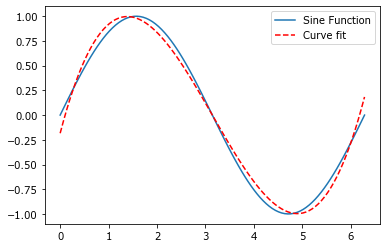

In [28]:
plt.plot(x,y, label = 'Sine Function')
plt.plot(x, poly3(x, *optimal_parameters), '--r', label = 'Curve fit')
plt.legend()

# Checking gradient

In [1]:
from scipy.optimize import check_grad

```python
check_grad(func, grad, x0, *args, **kwargs)
Docstring:
Check the correctness of a gradient function by comparing it against a
(forward) finite-difference approximation of the gradient.
```

In [4]:
np.info(check_grad)

 check_grad(func, grad, x0, *args, **kwargs)

Check the correctness of a gradient function by comparing it against a
(forward) finite-difference approximation of the gradient.

Parameters
----------
func : callable ``func(x0, *args)``
    Function whose derivative is to be checked.
grad : callable ``grad(x0, *args)``
    Gradient of `func`.
x0 : ndarray
    Points to check `grad` against forward difference approximation of grad
    using `func`.
args : \*args, optional
    Extra arguments passed to `func` and `grad`.
epsilon : float, optional
    Step size used for the finite difference approximation. It defaults to
    ``sqrt(numpy.finfo(float).eps)``, which is approximately 1.49e-08.

Returns
-------
err : float
    The square root of the sum of squares (i.e. the 2-norm) of the
    difference between ``grad(x0, *args)`` and the finite difference
    approximation of `grad` using func at the points `x0`.

See Also
--------
approx_fprime

Examples
--------
>>> def func(x):
...     retu

In [12]:
#objective Function
def func(v):
    x, y = v
    return x * x + y * y
#Gradient function
def grad(v): 
    x, y = v
    return 2 * x, 2 * y
#Check if grad gives correct gradient
#It returns the norm of the different between the gradient given, and a gradient computed numerically:
check_grad(func, grad, x0 = (2,2))

0.0

# Practical Optimization

<a href = 'https://scipy-lectures.org/advanced/mathematical_optimization/index.html'> Scipy lecture: Practical Optimization</a>

Without knowledge of the gradient:
 	
In general, prefer BFGS or L-BFGS, even if you have to approximate numerically gradients. These are also the default if you omit the parameter method - depending if the problem has constraints or bounds
On well-conditioned problems, Powell and Nelder-Mead, both gradient-free methods, work well in high dimension, but they collapse for ill-conditioned problems.
<hr>
With knowledge of the gradient:
BFGS or L-BFGS.
Computational overhead of BFGS is larger than that L-BFGS, itself larger than that of conjugate gradient. On the other side, BFGS usually needs less function evaluations than CG. Thus conjugate gradient method is better than BFGS at optimizing computationally cheap functions.
<hr>
With the Hessian:
 	
If you can compute the Hessian, prefer the Newton method (Newton-CG or TCG).
If you have noisy measurements:
 	
Use Nelder-Mead or Powell.